In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, make_scorer, roc_auc_score

In [2]:
train = pd.read_csv('Datasets/train.csv', sep='|')

In [3]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [5]:
#train = train[train.scannedLineItemsPerSecond < 0.07]
trainFraud = train[train['fraud']==1]
trainNotFraud = train[train['fraud']==0]
trainTrust = train[train['trustLevel'] < 3]

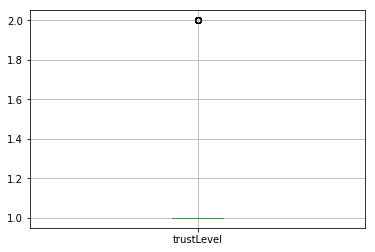

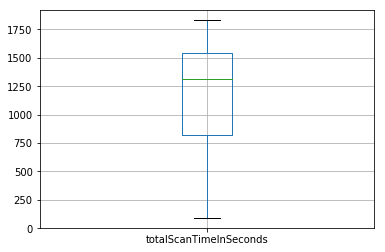

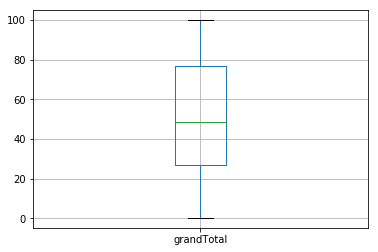

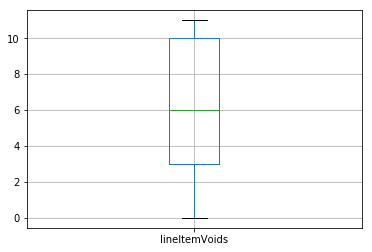

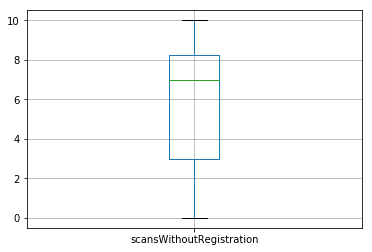

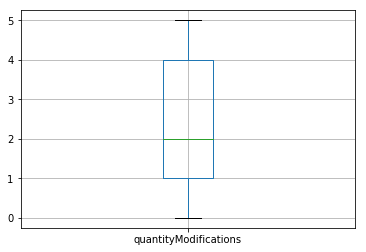

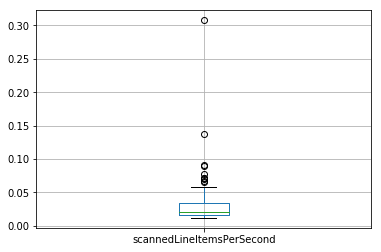

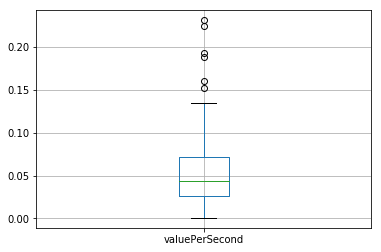

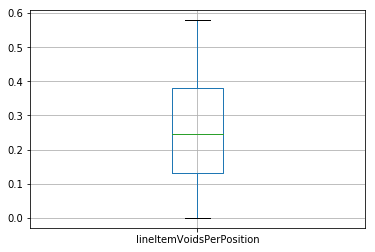

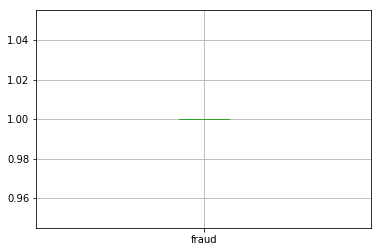

In [6]:
for column in trainFraud:
    plt.figure()
    trainFraud.boxplot([column])

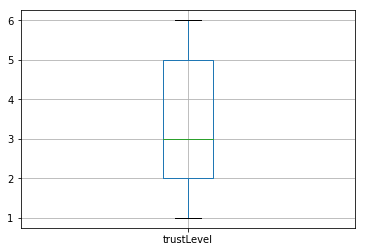

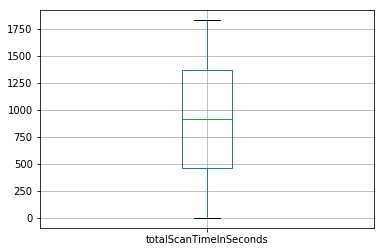

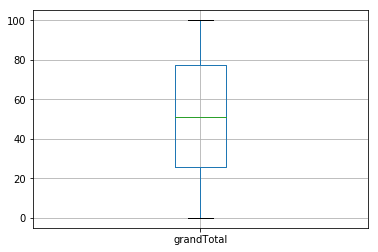

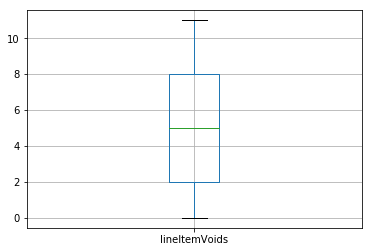

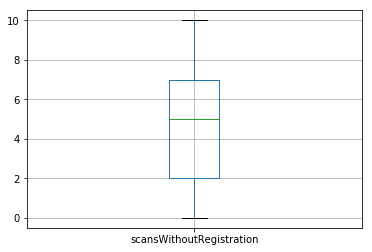

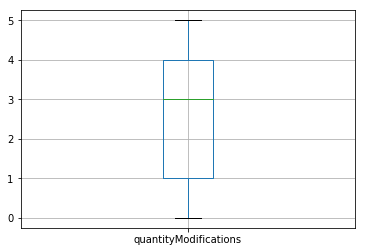

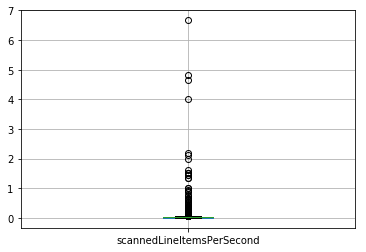

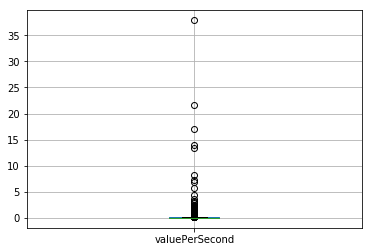

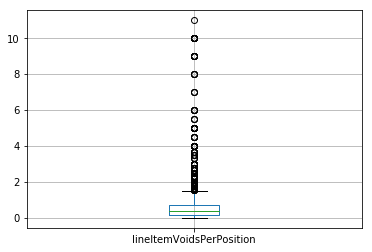

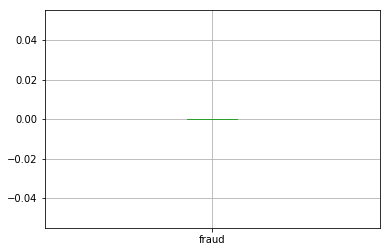

In [7]:
for column in trainNotFraud:
    plt.figure()
    trainNotFraud.boxplot([column])

In [8]:
#meanF

In [9]:
#stdF

In [10]:
#x = trainTrust[trainTrust["fraud"] == 0]
#x.mean()


In [11]:
stds = train.std()
means = train.mean()

train["OutofStdTrustLevel"] = 1
train["OutofStdTotalScanTimeInSeconds"] = 1
#train["OutofStdGrandTotal"] = 1
#train["OutofStdLineItemVoids"] = 1
# train["OutofStdScansWithoutRegistration"] = 1
# train["OutofStdQuantityModifications"] = 1
#train["OutofStdScannedLineItemsPerSecond"] = 1
#train["OutofStdValuePerSecond"] = 1
#train["OutofStdLineItemVoidsPerPosition"] = 1

In [12]:
for i in range(0, train.shape[0]): 
    if(train.loc[i]["trustLevel"] < 3):
        train.ix[i, "OutofStdTrustLevel"] = 0
        
for i in train.index.tolist(): 
    if(train.loc[i]["totalScanTimeInSeconds"] > 1000):
        train.ix[i, "OutofStdTotalScanTimeInSeconds"] = 0
    
# for i in range(0, train.shape[0]): 
#     if(abs(train.loc[i]["grandTotal"] - means["grandTotal"]) > stds["grandTotal"]):
#         train.ix[i, "OutofStdGrandTotal"] = 0
        
# for i in range(0, train.shape[0]): 
#     if(abs(train.loc[i]["lineItemVoids"] - means["lineItemVoids"]) > stds["lineItemVoids"]):
#         train.ix[i, "OutofStdLineItemVoids"] = 0
        
# for i in range(0, train.shape[0]): 
#     if(abs(train.loc[i]["scansWithoutRegistration"] - means["scansWithoutRegistration"]) > stds["scansWithoutRegistration"]):
#         train.ix[i, "OutofStdScansWithoutRegistration"] = 0
        
# for i in range(0, train.shape[0]): 
#     if(abs(train.loc[i]["quantityModifications"] - means["quantityModifications"]) > stds["quantityModifications"]):
#         train.ix[i, "OutofStdQuantityModifications"] = 0

# for i in range(0, train.shape[0]): 
#     if(abs(train.loc[i]["scannedLineItemsPerSecond"] - means["scannedLineItemsPerSecond"]) > stds["scannedLineItemsPerSecond"]):
#         train.ix[i, "OutofStdScannedLineItemsPerSecond"] = 0

# for i in range(0, train.shape[0]): 
#     if(abs(train.loc[i]["valuePerSecond"] - means["valuePerSecond"]) > stds["valuePerSecond"]):
#         train.ix[i, "OutofStdValuePerSecond"] = 0'
        
# for i in range(0, train.shape[0]): 
#     if(train.loc[i]["lineItemVoidsPerPosition"] > 0.3):
#         train.ix[i, "OutofStdLineItemVoidsPerPosition"] = 0



In [13]:
cols = train.columns.tolist()
cols = cols[0:9] + cols[10:] + cols[9:10]
train = train[cols]
#train = train.drop(columns=['trustLevel', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications',
#                           'scannedLineItemsPerSecond', 'valuePerSecond'])

train = train.drop(columns=['grandTotal'])

In [14]:
train.iloc[1:10]

trustLevel  totalScanTimeInSeconds  lineItemVoids  \
1           3                     108              5   
2           3                    1516              3   
3           6                    1791              8   
4           5                     430              3   
5           1                     770             11   
6           3                     294              2   
7           2                    1545              0   
8           6                     962              7   
9           2                     725             10   

   scansWithoutRegistration  quantityModifications  scannedLineItemsPerSecond  \
1                         2                      4                   0.129630   
2                        10                      5                   0.008575   
3                         4                      4                   0.016192   
4                         7                      2                   0.062791   
5                         5                      2                   0.033766   
6                         7                      1                   0.037415   
7                         8                      4                   0.006472   
8                         0                      2                   0.028067   
9                         2                      4                   0.037241   

   valuePerSecond  lineItemVoidsPerPosition  OutofStdTrustLevel  \
1        0.253333                  0.357143                   1   
2        0.041003                  0.230769                   1   
3        0.051541                  0.275862                   1   
4        0.189605                  0.111111                   1   
5        0.014403                  0.423077                   0   
6        0.189218                  0.181818                   1   
7        0.014757                  0.000000                   0   
8        0.068025                  0.259259                   1   
9        0.056662                  0.370370                   0   

   OutofStdTotalScanTimeInSeconds  fraud  
1                               1      0  
2                               0      0  
3                               0      0  
4                               1      0  
5                               1      1  
6                               1      0  
7                               0      0  
8                               1      0  
9                               1      0

In [15]:
X = train.drop('fraud', 1)
Y = train['fraud']
train.to_csv('Datasets/train_lourin.csv', sep='|', index=False)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# X_train['fraud'] = pd.Series(y_train, index=X_train.index) 

# X_train = remove_outlier(X_train, "lineItemVoidsPerPosition")
# X_train = remove_outlier(X_train, "scannedLineItemsPerSecond")
# X_train = remove_outlier(X_train, "valuePerSecond")

# y_train = X_train['fraud']
# X_train = X_train.drop('fraud', 1)

# size = len(X_train)

# for i in X_train.index.tolist():
#     if(X_train.loc[i]['fraud'] == 1):
#         X_train = X_train.append(X_train.loc[i])



In [2302]:
def scoreModel(model):

    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    matrix = confusion_matrix(y_test, y_pred)
    weightSum = np.sum(np.reshape(matrix, 4)*np.array([0,-5,-25,5]))
    print(f"Acuracy: {score*100}%")
    print(f"Score Cup: {weightSum}")
    print(f"Confusion matrix: \n{matrix}")

In [2303]:
RF = RandomForestClassifier(n_estimators=500, random_state=42, criterion='entropy').fit(X_train, y_train)

In [2304]:
scoreModel(RF)

Acuracy: 98.22866344605475%
Score Cup: -95
Confusion matrix: 
[[590   4]
 [  7  20]]


In [2305]:
def test_cross_val_predict(k = 3):
    clf = RandomForestClassifier(n_estimators=500, random_state=42, criterion='entropy').fit(X_train,  y_train)
    cv = KFold(n_splits=k, random_state=457, shuffle=True)
    y_pred = cross_val_predict(clf, X_test, y_test, cv=cv)
    matrix = confusion_matrix(y_test, y_pred)
    weightSum = np.sum(np.reshape(matrix, 4)*np.array([0,-5,-25,5]))
    print(f"Score Cup: {weightSum}")
    auc = roc_auc_score(y_test, y_pred, average=None)
    print(f"AUC: {auc*100}%")
    print(f"Confusion matrix: \n{matrix}")

In [2306]:
#test_cross_val_predict(10)

In [2307]:
test_cross_val_predict(3)

Score Cup: -470
AUC: 62.878787878787875%
Confusion matrix: 
[[593   1]
 [ 20   7]]


In [2308]:
test_cross_val_predict(5)

Score Cup: -350
AUC: 70.28619528619528%
Confusion matrix: 
[[593   1]
 [ 16  11]]


In [2309]:
#test_cross_val_predict(6)

In [2310]:
#test_cross_val_predict(7)

In [2311]:
X_train.to_csv('Datasets/x_train.csv', sep='|', index=False)
y_train.to_csv('Datasets/y_train.csv', sep='|', index=False)